<a href="https://colab.research.google.com/github/vedangi2610/FHE-project-/blob/master/ClusteringIV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt
import seaborn as sns
interest_vector = pd.read_csv('https://raw.githubusercontent.com/vedangi2610/FHE-project-/master/interest_vector/interest_vector.csv')

In [2]:
interest_vector.reset_index(level=0, inplace=True) #adding index as column
interest_vector.head()


,index,username,interest_vector,Politics,Entertainment,Healthcare,Sports,Entrepreneurship,ScienceandTech
0,0,viewfinderfc,"[0.24, 0.54, 0.17, 0.26, 0.31, 0.25]",0.24,0.54,0.17,0.26,0.31,0.25
1,1,FHF_Official,"[0.18, 0.48, 0.13, 0.18, 0.2, 0.19]",0.18,0.48,0.13,0.18,0.20,0.19
2,2,lisaschwarzbaum,"[0.48, 0.62, 0.34, 0.43, 0.57, 0.48]",0.48,0.62,0.34,0.43,0.57,0.48
3,3,zlatko_minev,"[0.26, 0.33, 0.22, 0.24, 0.38, 0.34]",0.26,0.33,0.22,0.24,0.38,0.34
4,4,tanyabasu,"[0.49, 0.58, 0.44, 0.44, 0.64, 0.63]",0.49,0.58,0.44,0.44,0.64,0.63


In [3]:
cluster_data = interest_vector[['Politics','Entertainment','Healthcare','Sports','Entrepreneurship','ScienceandTech']].copy(deep=True)
#cluster_data.dropna(axis=0, inplace=True)
#cluster_data.sort_values(by=['Politics','Entertainment','Healthcare','Sports','Entrepreneurship','ScienceandTech'], inplace=True)
cluster_array = np.array(cluster_data)
print(cluster_array)

[[0.24 0.54 0.17 0.26 0.31 0.25]
 [0.18 0.48 0.13 0.18 0.2  0.19]
 [0.48 0.62 0.34 0.43 0.57 0.48]
 [0.26 0.33 0.22 0.24 0.38 0.34]
 [0.49 0.58 0.44 0.44 0.64 0.63]
 [0.44 0.48 0.42 0.4  0.58 0.56]
 [0.29 0.37 0.22 0.27 0.45 0.31]
 [0.45 0.45 0.36 0.41 0.6  0.47]
 [0.33 0.39 0.26 0.27 0.58 0.37]
 [0.32 0.29 0.47 0.29 0.39 0.41]
 [0.45 0.36 0.72 0.35 0.51 0.55]
 [0.49 0.38 0.71 0.37 0.49 0.54]
 [0.33 0.42 0.25 0.56 0.42 0.35]
 [0.36 0.45 0.26 0.52 0.47 0.36]
 [0.25 0.32 0.19 0.35 0.33 0.25]
 [0.61 0.45 0.44 0.39 0.54 0.48]
 [0.34 0.25 0.34 0.25 0.26 0.29]
 [0.29 0.21 0.33 0.22 0.22 0.26]
 [0.43 0.38 0.33 0.31 0.46 0.46]
 [0.31 0.25 0.4  0.25 0.28 0.31]
 [0.27 0.26 0.22 0.29 0.33 0.34]
 [0.16 0.24 0.14 0.19 0.22 0.28]
 [0.42 0.41 0.58 0.35 0.51 0.57]
 [0.49 0.55 0.45 0.42 0.65 0.56]
 [0.35 0.42 0.32 0.33 0.49 0.5 ]
 [0.45 0.46 0.49 0.38 0.59 0.62]
 [0.36 0.38 0.35 0.32 0.47 0.44]
 [0.24 0.3  0.24 0.22 0.37 0.33]
 [0.41 0.48 0.36 0.36 0.58 0.52]
 [0.5  0.49 0.53 0.41 0.63 0.59]
 [0.54 0.4

In [10]:
print(interest_vector.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             114 non-null    int64  
 1   username          114 non-null    object 
 2   interest_vector   114 non-null    object 
 3   Politics          114 non-null    float64
 4   Entertainment     114 non-null    float64
 5   Healthcare        114 non-null    float64
 6   Sports            114 non-null    float64
 7   Entrepreneurship  114 non-null    float64
 8   ScienceandTech    114 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 8.1+ KB
None


CLUSTERING 1

In [5]:
def calc_distance(X1, X2):
    return (sum((X1 - X2)**2))**0.5

In [6]:
# Assign cluster clusters based on closest centroid
def assign_clusters(centroids, cluster_array):
    clusters = []
    for i in range(cluster_array.shape[0]):
        distances = []
        for centroid in centroids:
            distances.append(calc_distance(centroid, 
                                           cluster_array[i]))
        cluster = [z for z, val in enumerate(distances) if val==min(distances)]
        clusters.append(cluster[0])
    return clusters

In [7]:
# Calculate new centroids based on each cluster's mean
def calc_centroids(clusters, cluster_array):
    new_centroids = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array),
                            pd.DataFrame(clusters, 
                                         columns=['cluster'])], 
                           axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']\
                                     ==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

In [8]:
# Calculate variance within each cluster
def calc_centroid_variance(clusters, cluster_array):
    sum_squares = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array),
                            pd.DataFrame(clusters, 
                                         columns=['cluster'])], 
                           axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']\
                                     ==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        mean_repmat = np.matlib.repmat(cluster_mean, 
                                       current_cluster.shape[0],1)
        sum_squares.append(np.sum(np.sum((current_cluster - mean_repmat)**2)))
    return sum_squares

In [9]:
k = 6
cluster_vars = []
centroids = [cluster_array[i+2] for i in range(k)]
clusters = assign_clusters(centroids, cluster_array)
initial_clusters = clusters
print(0, round(np.mean(calc_centroid_variance(clusters, cluster_array))))
for i in range(20): #running the loop 20 times for covergence to obtain optimal clusters
    centroids = calc_centroids(clusters, cluster_array)
    clusters = assign_clusters(centroids, cluster_array)
    cluster_var = np.mean(calc_centroid_variance(clusters, 
                                                 cluster_array))
    cluster_vars.append(cluster_var)
    print(i+1, round(cluster_var))

0 1
1 1
2 1
3 1
4 1
5 1
6 1
7 1
8 1
9 1
10 1
11 1
12 1
13 1
14 1
15 1
16 1
17 1
18 1
19 1
20 1


In [13]:
print(cluster_var)

0.5767171473429952


CLUSTERING 2


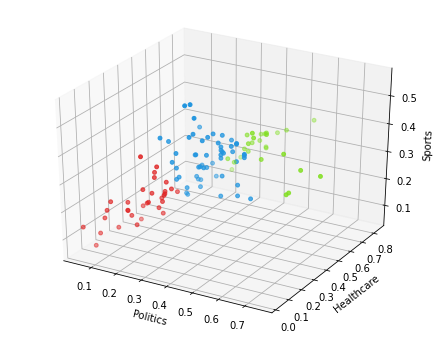

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib widget
colors = ['#DF2020', '#81DF20', '#2095DF']
kmeans = KMeans(n_clusters=3, random_state=0)
interest_vector['cluster'] = kmeans.fit_predict(interest_vector[['Politics', 'Healthcare', 'Sports']])
interest_vector['c'] = interest_vector.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(interest_vector.Politics, interest_vector.Healthcare, interest_vector.Sports, c=interest_vector.c, s=15)
ax.set_xlabel('Politics')
ax.set_ylabel('Healthcare')
ax.set_zlabel('Sports')
plt.show()


trying KNN?

In [8]:
cluster_data.head()

,index,Politics,Entertainment,Healthcare,Sports,Entrepreneurship,ScienceandTech
0,0,0.24,0.54,0.17,0.26,0.31,0.25
1,1,0.18,0.48,0.13,0.18,0.20,0.19
2,2,0.48,0.62,0.34,0.43,0.57,0.48
3,3,0.26,0.33,0.22,0.24,0.38,0.34
4,4,0.49,0.58,0.44,0.44,0.64,0.63


In [14]:
cluster_data = np.asarray(interest_vector[['index','Politics','Entertainment','Healthcare','Sports','Entrepreneurship','ScienceandTech']].copy(deep=True))
cluster_data_woindex = np.asarray(interest_vector[['Politics','Entertainment','Healthcare','Sports','Entrepreneurship','ScienceandTech']].copy(deep=True))
print(cluster_data)

[[0.00e+00 2.40e-01 5.40e-01 1.70e-01 2.60e-01 3.10e-01 2.50e-01]
 [1.00e+00 1.80e-01 4.80e-01 1.30e-01 1.80e-01 2.00e-01 1.90e-01]
 [2.00e+00 4.80e-01 6.20e-01 3.40e-01 4.30e-01 5.70e-01 4.80e-01]
 [3.00e+00 2.60e-01 3.30e-01 2.20e-01 2.40e-01 3.80e-01 3.40e-01]
 [4.00e+00 4.90e-01 5.80e-01 4.40e-01 4.40e-01 6.40e-01 6.30e-01]
 [5.00e+00 4.40e-01 4.80e-01 4.20e-01 4.00e-01 5.80e-01 5.60e-01]
 [6.00e+00 2.90e-01 3.70e-01 2.20e-01 2.70e-01 4.50e-01 3.10e-01]
 [7.00e+00 4.50e-01 4.50e-01 3.60e-01 4.10e-01 6.00e-01 4.70e-01]
 [8.00e+00 3.30e-01 3.90e-01 2.60e-01 2.70e-01 5.80e-01 3.70e-01]
 [9.00e+00 3.20e-01 2.90e-01 4.70e-01 2.90e-01 3.90e-01 4.10e-01]
 [1.00e+01 4.50e-01 3.60e-01 7.20e-01 3.50e-01 5.10e-01 5.50e-01]
 [1.10e+01 4.90e-01 3.80e-01 7.10e-01 3.70e-01 4.90e-01 5.40e-01]
 [1.20e+01 3.30e-01 4.20e-01 2.50e-01 5.60e-01 4.20e-01 3.50e-01]
 [1.30e+01 3.60e-01 4.50e-01 2.60e-01 5.20e-01 4.70e-01 3.60e-01]
 [1.40e+01 2.50e-01 3.20e-01 1.90e-01 3.50e-01 3.30e-01 2.50e-01]
 [1.50e+01

In [15]:
from math import sqrt
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

In [23]:
#small example to test our distance function by printing the distance between the first row and all other rows
distances=[]
row0=cluster_data_woindex[0]
for row in cluster_data_woindex:
  distance = euclidean_distance(row0, row)
  distances.append(distance)
print(distances)

[0.0, 0.17578395831246948, 0.4922397789695587, 0.24576411454889016, 0.6501538279515087, 0.5428627819255986, 0.23916521486202802, 0.49325449820554096, 0.35510561809129404, 0.43794976880916375, 0.7190966555338718, 0.7129516112612412, 0.37549966711037175, 0.3686461718233352, 0.2395829710142188, 0.583609458456595, 0.3566510900025402, 0.3831448812133604, 0.39547439866570383, 0.3827531841800928, 0.30199337741083004, 0.33346664001066134, 0.6065476073648299, 0.6150609725872712, 0.3857460304397182, 0.6185466837676845, 0.37107950630558945, 0.27221315177632405, 0.4737087712930804, 0.6634756966159349, 0.863075894692929, 0.4982971001320397, 0.5638262143604179, 0.39774363602702684, 0.2981610303175115, 0.408166632639171, 0.5960704656330491, 0.4947726750741193, 0.5936328831862332, 0.5711392124517454, 0.5046781152378217, 0.36537651812890226, 0.2707397274136177, 0.5519963767997033, 0.2664582518894845, 0.39496835316263, 0.35468295701936403, 0.4737087712930804, 0.4033608806019741, 0.43531597719357834, 0.4

In [38]:
#getting indices of top min 5

min_indices = np.argsort(distances)[:6] #as the 1st value will always be the username itself
print(min_indices)
min_indices = min_indices[1:] #slicing the array to remove 1st element
print(min_indices)


[  0 109 108 105 107   1]
[109 108 105 107   1]


IGNORE (TRIED TO PLOT AND VISUALISE CLUSTERS)

In [15]:
#@title Enter username

username= 'viewfinderfc' #@param {type:"string"}
print (username)

viewfinderfc


In [18]:
getrecsfor = interest_vector["interest_vector"].loc[interest_vector['username'] == username]
print(getrecsfor)

0    [0.24, 0.54, 0.17, 0.26, 0.31, 0.25]
Name: interest_vector, dtype: object


In [19]:
 new_data_point = np.array(getrecsfor)
 print(new_data_point)

['[0.24, 0.54, 0.17, 0.26, 0.31, 0.25]']


In [21]:
distances = np.linalg.norm(P - getrecsfor, axis=1)

ValueError: ignored

In [13]:
P = cluster_data.drop("Politics", axis=1)
P = P.values
En = cluster_data.drop("Entertainment", axis=1)
En = En.values
H = cluster_data.drop("Healthcare", axis=1)
H = H.values
Sp = cluster_data.drop("Sports", axis=1)
Sp = Sp.values
Es = cluster_data.drop("Entrepreneurship", axis=1)
Es = Es.values
Sc = cluster_data.drop("ScienceandTech", axis=1)
Sc = Sc.values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


ValueError: ignored

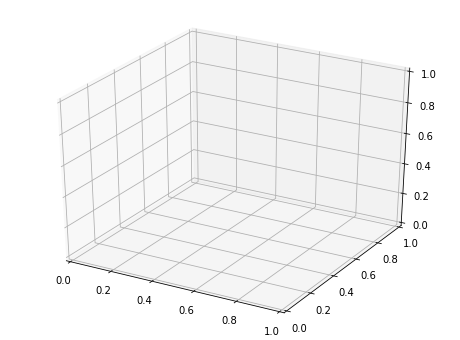

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot6d import Axes6D
import matplotlib as mpl
import numpy as np
import seaborn as sns
%matplotlib inline
# testing out scatter plots
fig = plt.figure(figsize=(8, 6))
plt.title('Politics	Entertainment	Healthcare	Sports	Entrepreneurship	ScienceandTech', fontsize=14)
ax = fig.add_subplot(111, projection='3d')
xs = list(cluster_data['Politics'])
ys = list(cluster_data['Entertainment'])
zs = list(cluster_data['Healthcare'])
us = list(cluster_data['Sports'])
vs = list(cluster_data['Entrepreneurship'])
ws = list(cluster_data['ScienceandTech'])
data_points = [( x, y, z, u,v,w,) for u,v,w,x, y, z in zip(xs, ys, zs,us,vs,ws)]
for data in zip(data_points):
    x, y, z,u,v,w = data
    ax.scatter(x, y, z,u,v,w, alpha=0.4, edgecolors='none', s=30)

ax.set_xlabel('pol')
ax.set_ylabel('ent')
ax.set_zlabel('h')
ax.set_ulabel('sp')
ax.set_vlabel('eship')
ax.set_wlabel('scitech')